# Ridge, Lasso Regression: Algerian Forest Fires Dataset

# Dataset Information

### Additional Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes).

### Additional Variable Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely   Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("4. Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
df[df.isnull().any(axis=1)]     #Merging the datasets of two regions by dropping unnecessary rows in between.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset will be converted into two sets based on Region from 122nd index, we can make a new column based on the Region

0 :  "Bejaia Region"

1 :  "Sidi-Bel Abbes Region"

Add new column with region

In [5]:
df.loc[:122,'Region'] = 0   # 0 to Region before 122 index
df.loc[122:,'Region'] = 1   # 1 to Region after 122 index
df['Region'] = df['Region'].astype(int)

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df.dropna(inplace=True)                         #Removing null rows
df.reset_index(drop=True,inplace=True)          #Resetting index after dropping

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.iloc[[122]]  #Removing this as well

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [10]:
df = df.drop(122).reset_index(drop=True)

In [11]:
df.shape

(243, 15)

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [14]:
df.duplicated().sum()

0

In [15]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.columns  #Spaces in the column names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
# Fixing those spaces
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
# Converting the dtypes of columns
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [19]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Exploratory Data Analysis

In [20]:
# Removing unnecessary columns
df.drop(columns=['day','month','year'],inplace=True)

In [21]:
df.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


In [22]:
# Here we have one categorical variable as Classes. So we need to encode it: 1: fire and 0: not fire
# But we have to remove those whitespaces
df['Classes'] = df['Classes'].str.strip()

In [23]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [24]:
# Now encoding!
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1}).astype(int)

In [25]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [26]:
df['Classes'].value_counts(normalize=True)

Classes
1    0.563786
0    0.436214
Name: proportion, dtype: float64

<Figure size 640x480 with 0 Axes>

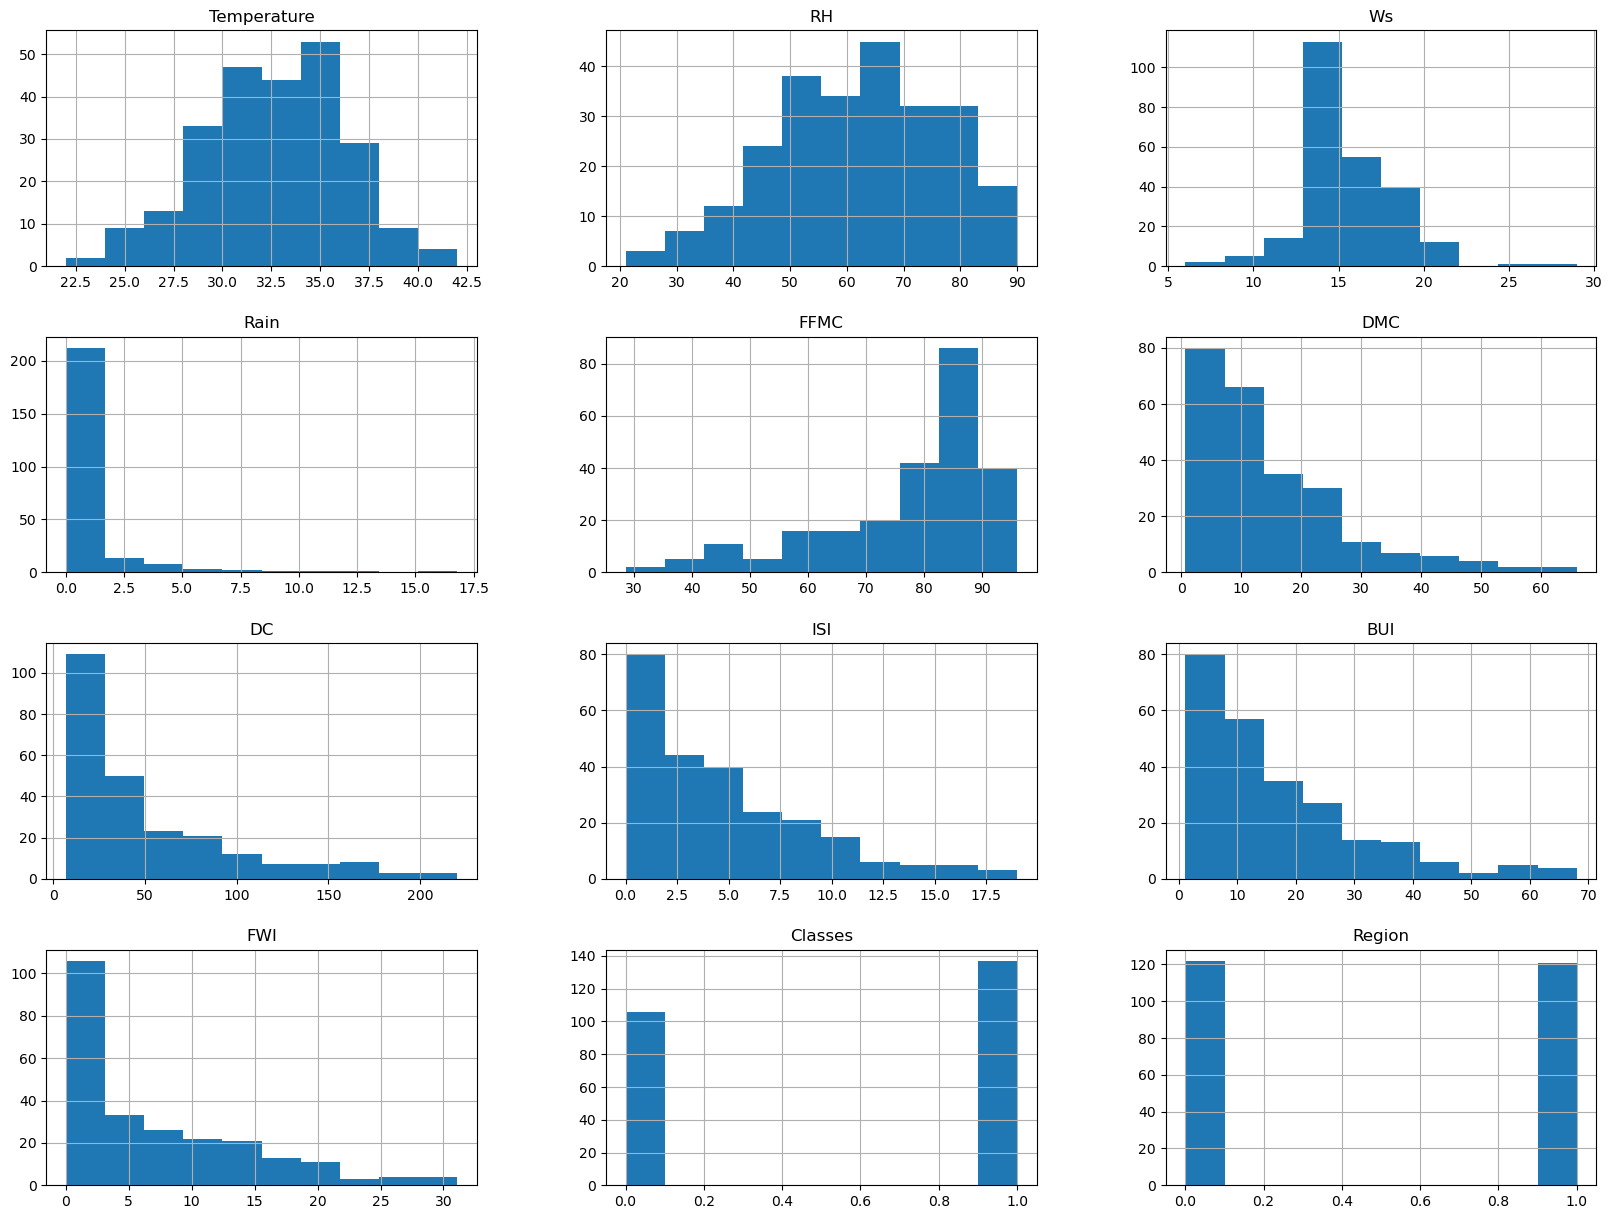

In [27]:
# Plot density plots
plt.suptitle('Univariate Analysis of Features')
df.hist(figsize=(20,15))
plt.show()

In [28]:
# plt.show(sns.pairplot(df))

In [29]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


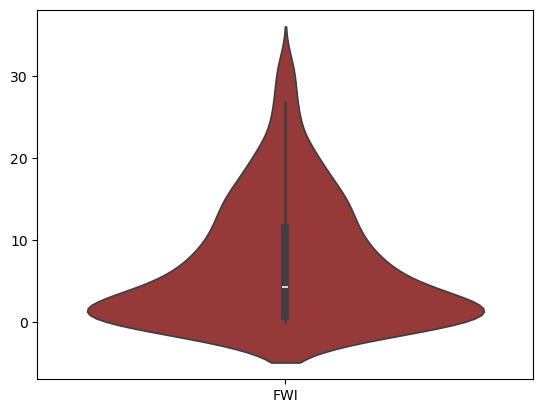

In [30]:
sns.violinplot(df[['FWI']],color='brown')
plt.show()

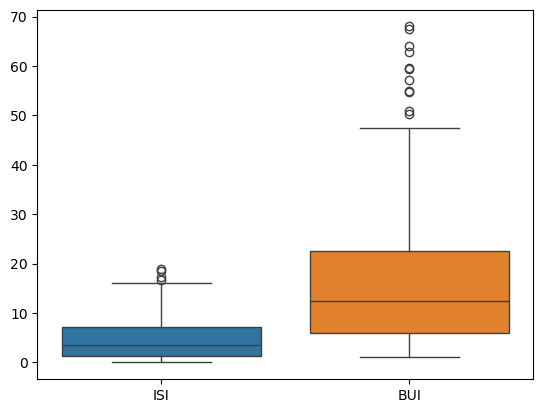

In [31]:
sns.boxplot(df[['ISI','BUI']])
plt.show()

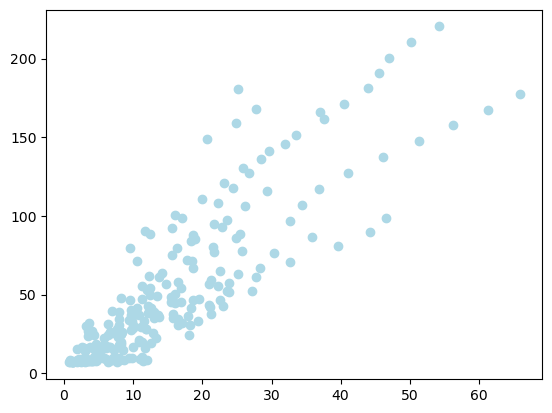

In [32]:
plt.scatter(x="DMC",y='DC',data=df,color='lightblue')
plt.show()

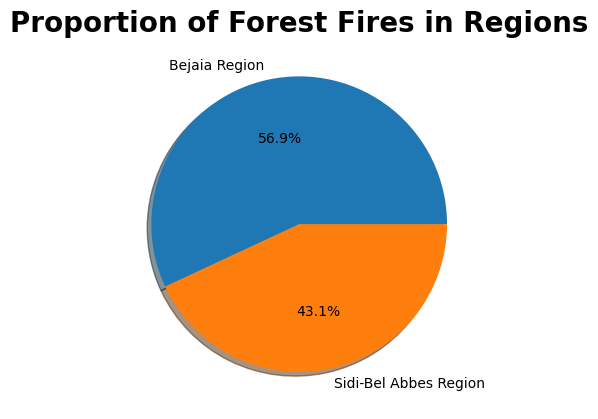

In [33]:
region = df[df['Classes']==1]['Region'].value_counts().to_dict()
plt.title("Proportion of Forest Fires in Regions",fontsize=20,fontweight='bold')
plt.pie(region.values(),labels=["Bejaia Region","Sidi-Bel Abbes Region"],autopct="%1.1f%%",shadow=True)
plt.show()

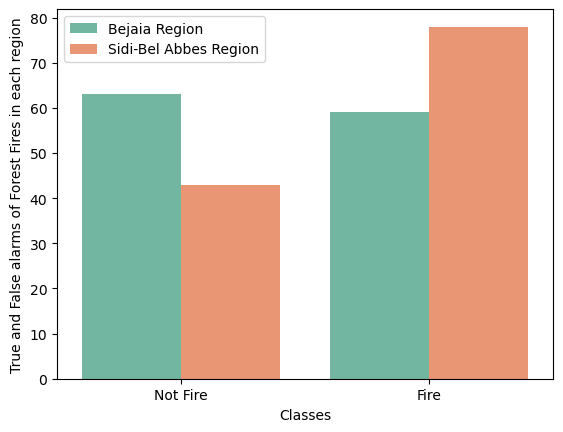

In [34]:
sns.countplot(x='Classes',hue='Region',data=df,palette='Set2')
plt.xticks(ticks=[0,1],labels=['Not Fire','Fire'])
plt.legend(labels=["Bejaia Region","Sidi-Bel Abbes Region"])
plt.ylabel("True and False alarms of Forest Fires in each region")
plt.show()

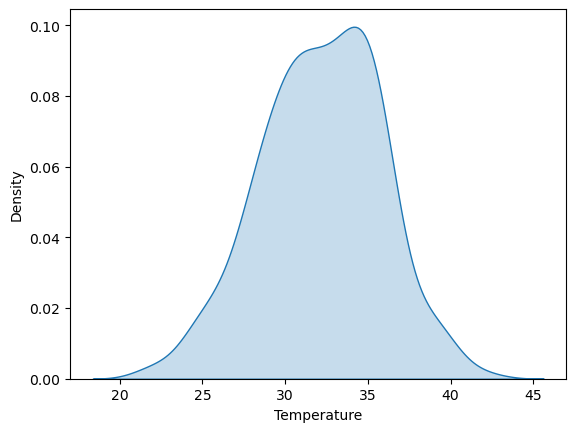

In [35]:
sns.kdeplot(df['Temperature'],fill=True)
plt.show()

## Feature Selection

In [36]:
# Independent and dependent features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [37]:
X.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0


In [38]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [39]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
X_train.shape, X_test.shape

((170, 11), (73, 11))

In [41]:
y_train

29     12.9
120     0.1
114     0.7
241     0.7
5       2.5
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 170, dtype: float64

In [42]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


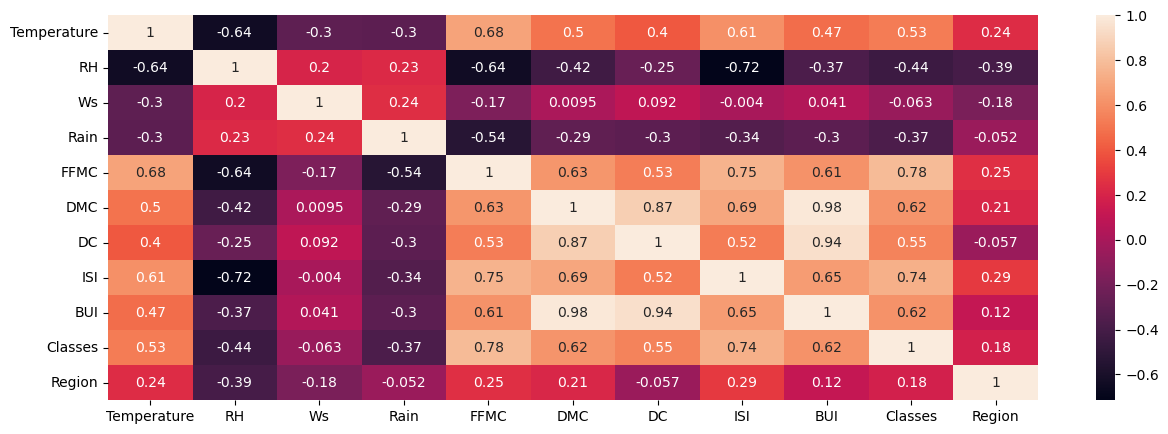

In [43]:
# Check for multicollinearity,i.e., the independent feature must not be much correlated.
plt.figure(figsize=(15,5))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [44]:
# Function to return the features which are highly correlated as they are perfectly correlated and add no new information to a dataset.
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:
# Threshold defined by Domain Experts
# Highly correlated features are redundant to dataset and should be removed.
cols = correlation(X_train,0.85)
cols

{'BUI', 'DC'}

In [46]:
# Dropping these features
X_train.drop(columns=cols,inplace=True)
X_test.drop(columns=cols,inplace=True)

In [47]:
X_train.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
29,33,50,14,0.0,88.7,22.9,7.2,1,0
120,26,80,16,1.8,47.4,2.9,0.3,0,0
114,32,54,11,0.5,73.7,7.9,1.2,0,0


In [48]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_train

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

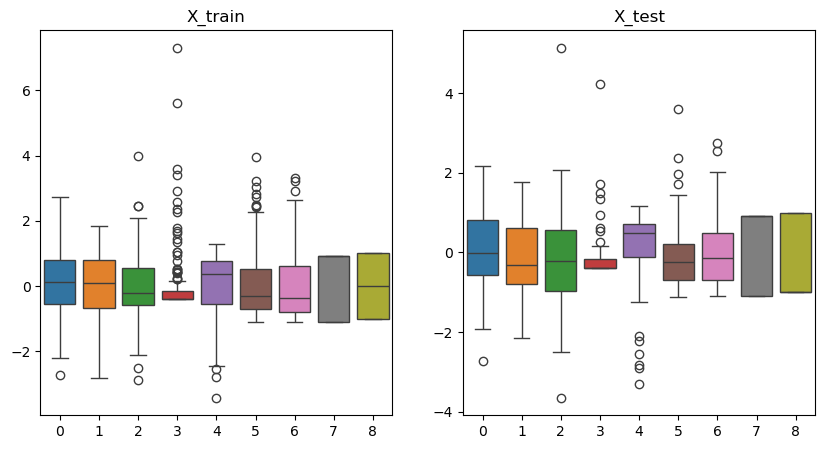

In [51]:
## Box plot to understand effect of Standard scaling
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('X_train')
sns.boxplot(data = X_train)
plt.subplot(1,2,2)
plt.title('X_test')
sns.boxplot(data=X_test)
plt.show()

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [53]:
regression.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = regression.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print("Mean absolute Error: ",mae)
print("Mean squared Error: ",mse)
print("Root Mean squared Error: ",rmse)
print("R2 Accuracy score: ",r2score)    # So much accuracy, it may be overfitting

Mean absolute Error:  0.5648036371485076
Mean squared Error:  0.6829306792403725
Root Mean squared Error:  0.8263961999188842
R2 Accuracy score:  0.9847206874554418


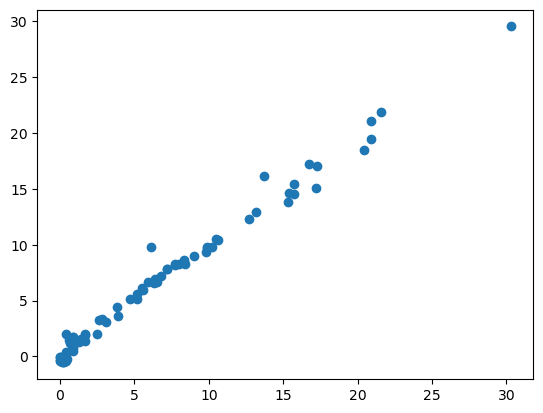

In [56]:
# Scatter plot
plt.scatter(y_test,y_pred)
plt.show()

### Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
lassoregression = Lasso()
lassoregression.fit(X_train,y_train)
y_pred = lassoregression.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print("Mean absolute Error: ",mae)
print("Mean squared Error: ",mse)
print("Root Mean squared Error: ",rmse)
print("R2 Accuracy score: ",r2score)        # We are getting accuracy of 95%

Mean absolute Error:  1.1203368882393199
Mean squared Error:  2.1840267665734507
Root Mean squared Error:  1.477845312126222
R2 Accuracy score:  0.9511364350928344


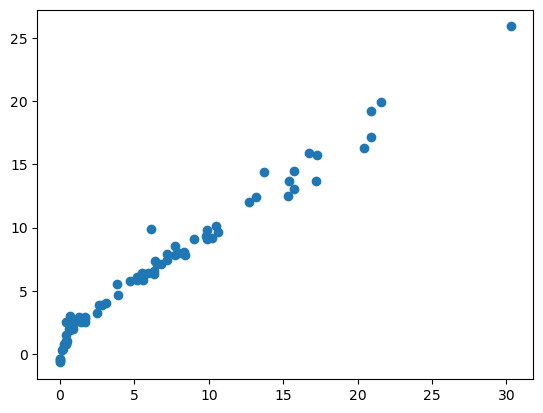

In [58]:
plt.scatter(y_test,y_pred)
plt.show()

### Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
ridgeregression = Ridge()
ridgeregression.fit(X_train,y_train)
y_pred = ridgeregression.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print("Mean absolute Error: ",mae)
print("Mean squared Error: ",mse)
print("Root Mean squared Error: ",rmse)
print("R2 Accuracy score: ",r2score)        # Accuracy quite similar to that of Linear regression, maybe there was possibly very less overfitting.

Mean absolute Error:  0.5844876727578062
Mean squared Error:  0.7079451074397777
Root Mean squared Error:  0.841394739370159
R2 Accuracy score:  0.9841610358272455


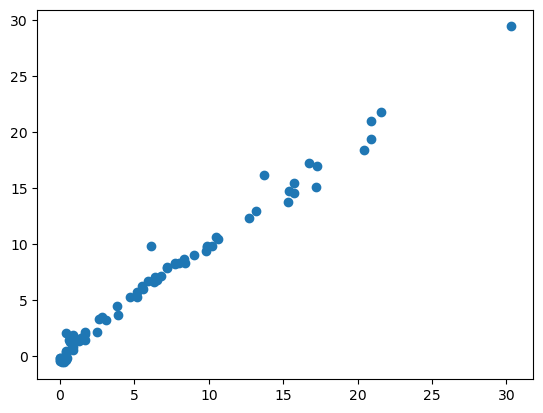

In [60]:
plt.scatter(y_test,y_pred)
plt.show()

### ElasticNet Regression

In [61]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
y_pred = elasticnet.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print("Mean absolute Error: ",mae)
print("Mean squared Error: ",mse)
print("Root Mean squared Error: ",rmse)
print("R2 Accuracy score: ",r2score)        

Mean absolute Error:  1.855468747971755
Mean squared Error:  5.345346375670645
Root Mean squared Error:  2.312000513769546
R2 Accuracy score:  0.8804077479376988


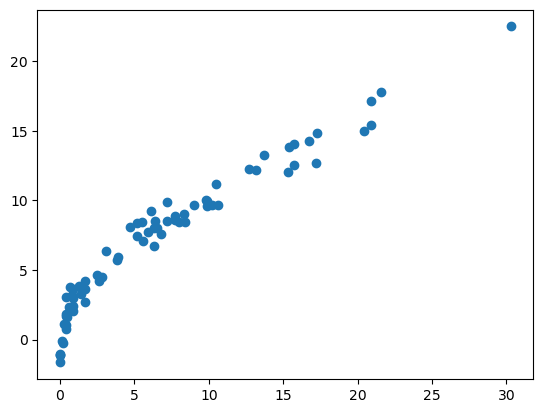

In [62]:
plt.scatter(y_test,y_pred)
plt.show()

### Cross Validation Lasso

In [63]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train,y_train)

LassoCV(cv=5)

In [64]:
lassocv.predict(X_test)

array([ 8.16397207,  7.67804744, -0.25189771,  4.77987505,  6.78091283,
        1.81614639,  2.22578301,  7.63488733,  2.02410339,  3.44451117,
        0.66242944,  9.99905308,  9.35795141, 16.96297721, 18.25149952,
        1.66970735,  1.61943284, -0.74666772,  7.27602907,  3.10770548,
        2.01253998,  0.16535072,  6.47186084,  0.12797246, 20.96857542,
        5.11509091,  5.85109963,  9.74520405, -0.89721414,  9.90860031,
        6.7060563 , -0.30293842, 10.29361523, 14.41049039,  1.76750782,
        0.88833515,  2.01997732,  5.96647081, -0.68302491, -0.62508115,
        6.45233271,  2.14437167,  8.46063792, -0.94632281, 15.39177571,
        8.31767104,  8.47395999,  1.44833946, 13.01341005,  1.22369685,
       29.03757686,  5.49338626, 17.13273437, 19.25389134, 13.68892486,
       16.02178729,  1.0354206 ,  9.07993294,  3.8419495 , 14.42765364,
        5.22475186,  1.16678645, -0.43979232, 21.8126402 ,  3.43931301,
        1.79083669,  9.64615263,  6.96670663, 10.28790792, -0.86

In [65]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [66]:
lassocv.alpha_

0.06177603120682054

In [67]:
lassocv.mse_path_   # Since We have given cv=5, so 500 mse paths will be there

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

In [68]:
y_pred = lassocv.predict(X_test)
r2_score(y_test,y_pred)

0.9821627684487946

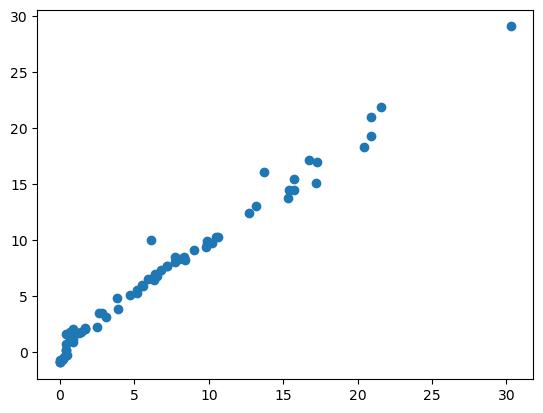

In [69]:
plt.scatter(y_test,y_pred)
plt.show()

### Ridge Cross Validation

Mean absolute Error:  0.7943132619521933
Mean squared Error:  1.0627383242719166
Root Mean squared Error:  1.0308920041749847
R2 Accuracy score:  0.976223192919533


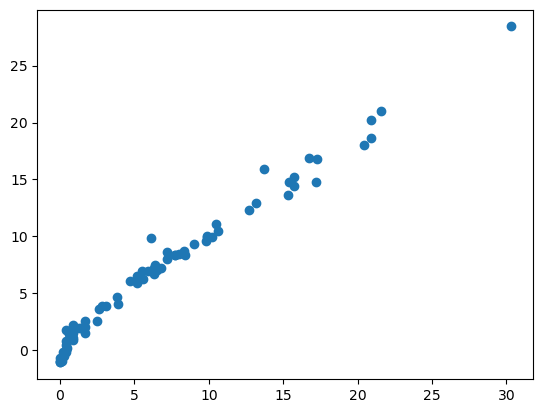

In [70]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_pred = ridgecv.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print("Mean absolute Error: ",mae)
print("Mean squared Error: ",mse)
print("Root Mean squared Error: ",rmse)
print("R2 Accuracy score: ",r2score) 
plt.scatter(y_test,y_pred)
plt.show()

In [71]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### Elastic Cross Validation

Mean absolute Error:  0.6856401038998683
Mean squared Error:  0.8608422455718342
Root Mean squared Error:  0.9278158467992634
R2 Accuracy score:  0.9807402447693789


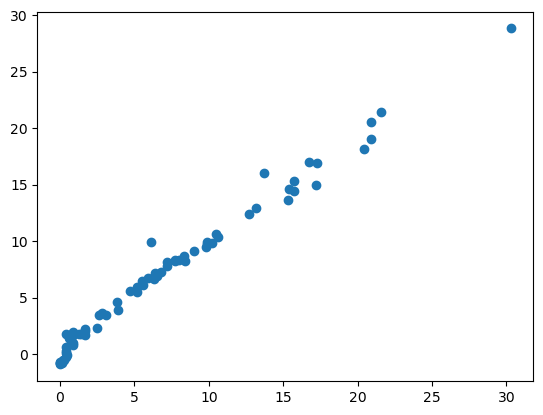

In [72]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train,y_train)
y_pred = elasticcv.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print("Mean absolute Error: ",mae)
print("Mean squared Error: ",mse)
print("Root Mean squared Error: ",rmse)
print("R2 Accuracy score: ",r2score) 
plt.scatter(y_test,y_pred)
plt.show()

In [73]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [74]:
elasticcv.alphas_

array([14.20548481, 13.24808267, 12.35520624, 11.52250669, 10.74592831,
       10.0216887 ,  9.34626043,  8.71635375,  8.12890068,  7.58103998,
        7.07010326,  6.59360196,  6.14921526,  5.73477873,  5.34827384,
        4.98781808,  4.65165584,  4.3381498 ,  4.04577303,  3.77310146,
        3.51880705,  3.28165124,  3.06047893,  2.85421289,  2.66184849,
        2.48244881,  2.31514007,  2.15910738,  2.01359077,  1.87788149,
        1.75131856,  1.63328555,  1.52320757,  1.42054848,  1.32480827,
        1.23552062,  1.15225067,  1.07459283,  1.00216887,  0.93462604,
        0.87163538,  0.81289007,  0.758104  ,  0.70701033,  0.6593602 ,
        0.61492153,  0.57347787,  0.53482738,  0.49878181,  0.46516558,
        0.43381498,  0.4045773 ,  0.37731015,  0.35188071,  0.32816512,
        0.30604789,  0.28542129,  0.26618485,  0.24824488,  0.23151401,
        0.21591074,  0.20135908,  0.18778815,  0.17513186,  0.16332856,
        0.15232076,  0.14205485,  0.13248083,  0.12355206,  0.11

## Model Pickling

We will pickle our Ridge Regression model as it has the best accuracy of all.

In [75]:
import pickle
pickle.dump(ridgeregression,open('ridge.pkl','wb'))

In [76]:
# We will also pickle scaler object
pickle.dump(scaler,open('scaler.pkl','wb'))

In [77]:
pickle.load(open('ridge.pkl','rb'))

Ridge()